# Praktikum 1: Klasifikasi 🐱 dan 🐶

### Langkah 1 - Import Library

In [ ]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

### Langkah 2 - Pra Pengolahan Data

#### Langkah 2.1. Pra Pengolahan Data Training

dataset telah diupload ke drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/dataset/training_set',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 8006 images belonging to 2 classes.


#### Langkah 2.2. Pra Pengolahan Data Testing

In [ ]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/dataset/test_set',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 2000 images belonging to 2 classes.


### Langkah 3 - Pembuatan Model CNN

#### Langkah 3.1.  - Inisiasi Model CNN

In [ ]:
cnn = tf.keras.models.Sequential()

#### Langkah 3.2. - Pembuatan Layer Konvolusi 1

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))

#### Langkah 3.3 - Pembuatan Layer Pooling 1

In [ ]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

#### Langkah 3.4 - Pembuatan Layer Konvolusi 2 dan Pooling 2

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

#### Langkah 3.5 - Flattening

In [ ]:
cnn.add(tf.keras.layers.Flatten())

#### Langkah 3.6 - Fully Connected Layer 1 (Input)

In [ ]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

#### Langkah 3.7 - Fully Connected Layer 2 (Output)

In [ ]:
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

#### Langkah 3.8 - Compile Model CNN

In [ ]:
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

### Langkah 4 - Fit CNN

In [ ]:
cnn.fit(x = training_set, validation_data = test_set, epochs = 25)

Epoch 1/25
251/251 [==============================] - 1539s 6s/step - loss: 0.6661 - accuracy: 0.5827 - val_loss: 0.6013 - val_accuracy: 0.6785
Epoch 2/25
251/251 [==============================] - 47s 186ms/step - loss: 0.5956 - accuracy: 0.6822 - val_loss: 0.5535 - val_accuracy: 0.7385
Epoch 3/25
251/251 [==============================] - 49s 194ms/step - loss: 0.5451 - accuracy: 0.7236 - val_loss: 0.6580 - val_accuracy: 0.6695
Epoch 4/25
251/251 [==============================] - 47s 188ms/step - loss: 0.5178 - accuracy: 0.7482 - val_loss: 0.4917 - val_accuracy: 0.7650
Epoch 5/25
251/251 [==============================] - 47s 187ms/step - loss: 0.4953 - accuracy: 0.7613 - val_loss: 0.4945 - val_accuracy: 0.7660
Epoch 6/25
251/251 [==============================] - 47s 187ms/step - loss: 0.4795 - accuracy: 0.7675 - val_loss: 0.4858 - val_accuracy: 0.7715
Epoch 7/25
251/251 [==============================] - 52s 206ms/step - loss: 0.4596 - accuracy: 0.7809 - val_loss: 0.4669 - val_acc

### Langkah 5 - Prediksi dengan 1 Citra

In [ ]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('/content/drive/MyDrive/dataset/single_prediction/cat_or_dog_1.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
  prediction = 'dog'
else:
  prediction = 'cat'

1/1 [==============================] - 0s 115ms/step


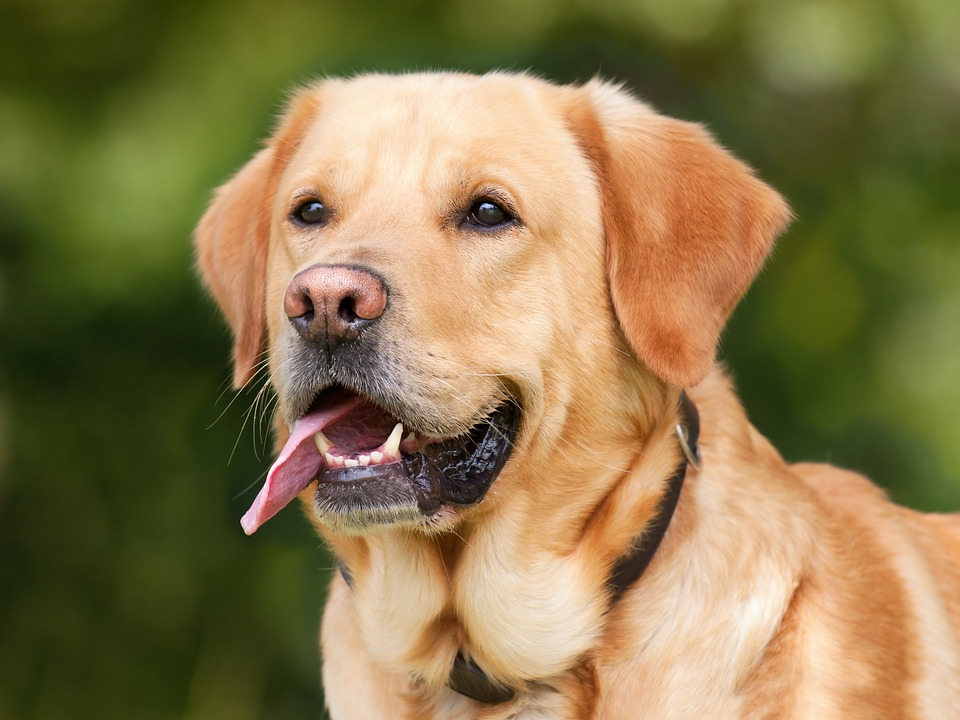

Prediction = dog


In [ ]:
import cv2
from google.colab.patches import cv2_imshow
test_img = cv2.imread('/content/drive/MyDrive/dataset/single_prediction/cat_or_dog_1.jpg')
cv2_imshow(test_img)
print('Prediction = ' + prediction)

# Praktikum 2: Klasifikasi Multi-label dengan Data CIFAT

### Langkah 1 - Load Library

In [ ]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

### Langkah 2 - Unduh Dataset CIFAR

In [ ]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

170498071/170498071 [==============================] - 4s 0us/step


### Langkah 3 - Verifikasi Data

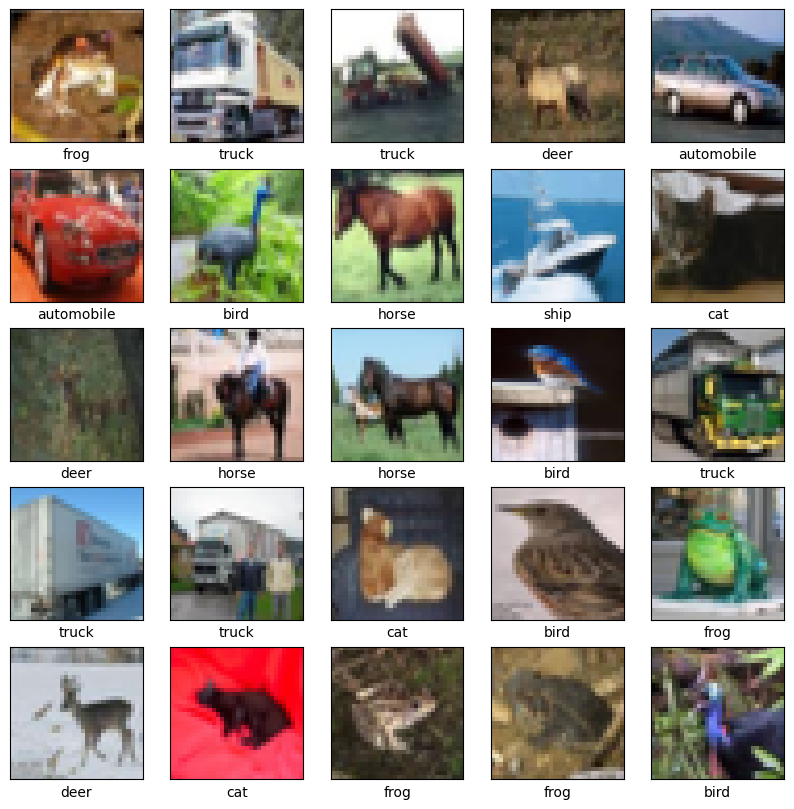

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays,
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

### Langkah 4 - Buat Model CNN

#### Langkah 4.1. - Buat Layer Konvolusi

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

#### Langkah 4.2. - Cek Arsitektur Konvolusi

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
Total params: 56320 (220.00 KB)
Trainable params: 5632

#### Langkah 4.3. - Tambahkan Layer Fully Connected

In [ ]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

#### Langkah 4.4. - Cek Arsitektur Model CNN

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten_1 (Flatten)         (None, 1024)             

#### Langkah 4.5. - Compile Model CNN

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### Langkah 5 - Fit Model

In [ ]:
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 46s 29ms/step - loss: 1.5289 - accuracy: 0.4440 - val_loss: 1.3037 - val_accuracy: 0.5329
Epoch 2/10
1563/1563 [==============================] - 44s 28ms/step - loss: 1.1534 - accuracy: 0.5890 - val_loss: 1.1583 - val_accuracy: 0.5828
Epoch 3/10
1563/1563 [==============================] - 45s 29ms/step - loss: 0.9980 - accuracy: 0.6502 - val_loss: 0.9777 - val_accuracy: 0.6522
Epoch 4/10
1563/1563 [==============================] - 43s 28ms/step - loss: 0.8974 - accuracy: 0.6863 - val_loss: 0.9065 - val_accuracy: 0.6848
Epoch 5/10
1563/1563 [==============================] - 43s 28ms/step - loss: 0.8236 - accuracy: 0.7112 - val_loss: 0.9385 - val_accuracy: 0.6780
Epoch 6/10
1563/1563 [==============================] - 45s 29ms/step - loss: 0.7637 - accuracy: 0.7330 - val_loss: 0.8823 - val_accuracy: 0.6935
Epoch 7/10
1563/1563 [==============================] - 43s 28ms/step - loss: 0.7163 - accuracy: 0.7500 - val_loss: 0.8374 -

### Langkah 6 - Evaluasi Model

313/313 - 2s - loss: 0.8635 - accuracy: 0.7099 - 2s/epoch - 7ms/step


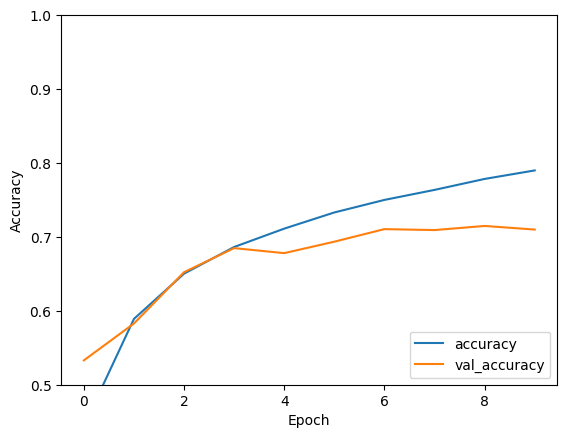

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

### Langkah 7 - Cetak Hasil Akurasi

In [ ]:
print(test_acc)

0.7099000215530396
